In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
import pandas as pd
import collections
import string
%matplotlib inline

from cipher.keyword_cipher import *
from cipher.column_transposition import *
from cipher.railfence import *
from support.utilities import *
from support.text_prettify import *
from support.language_models import *
from support.plot_frequency_histogram import *

c5a = open('5a.ciphertext').read()
c5b = open('5b.ciphertext').read()

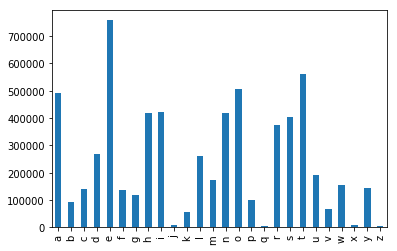

In [2]:
freqs = pd.Series(english_counts)
freqs.plot(kind='bar')

In [3]:
c5bs = sanitise(c5b)
c5bs

'sssatanuelclaendeeheevrnhtailsltocsoeoanuodoeecaferbetrtenoiiucrwurfaproeercssoeuatulgtematremlieaveieogcelesaeeeyyiuuoaidaosdmdecsshthuhatcnxaererseltunaghanrdtevepisydtaeamcinmrnweoramrvibodsdfdpatimrssietdaospecgracnetblfioeushsmeeirlshmittrlnesehmclssoswfottwnbyteyngeymttgstariixeeedrnasmltwgmildcrtseogohrolsshmawndsstrabndnecfcayehotdornonenecatneavoeaatehercyrighsayrefsooatemncwtkaaawndadmsllnnnlutfoeeenoyoewtmanrrsxhvorolhisfunnthaeeofolphebaatmnornoeodnvtphnoetedeaeonphpaeuratvhndetahrahpoorsefovddsttpsvgraaatodsuryidovtrelerltmemdheoarshoarrrerxisgeifawfaiyidusiyieeesotkeaelatresntifemteiaighaceiondktkitteaeanecnndictnedddenstsheanrtamneahshidaocnuissctehslnlectheetlltidlcttnpnmcvsvnositdaelxpihsfattysfoedcmwhtebaachertaigriuirtngiaphetrowehwswaacmgcouwoogoegsmtarteeiemvayinogstitagblncstcycolretedarehopnebyegwcteetlteyeteenansafmo'

In [4]:
key_a, score = keyword_break_mp(c5a)
key_a, score

(('seabird', <KeywordWrapAlphabet.from_largest: 3>), -1255.0542494109186)

In [5]:
print(prettify(keyword_decipher(sanitise(c5a), key_a[0], key_a[1])))

harry i cracked that last message for myself and noticed something really odd the text said it was
encrypted using a column transposition with keyword seabird but it was enciphered using a rail fence
cipher i can only assume that the text we retrieved was an archive of the original message re
encrypted for safety whoever the flag day associates are they have a pretty sophisticated operation
if they are filing messages like this more like one of the major terrorist groups than the usual
hacker collective the tech guys took a look at the aerial from the boat and they tell me that it is
a drag wire usually used to communicate with a submarine when submerged it carried an acoustic
transducer array as well as a shortwave transmitter and listening gear one thing that puzzles me now
is why we were allowed to find the ship floating at all surely they must have planned to sink her
using the scuttling equipment otherwise what was it for they seem too smart to leave it floating for
us to find any

In [6]:
key_b, score = column_transposition_break_mp(c5bs)
key_b, score

(((3, 2, 4, 1, 5, 0), False, True), -1998.321513226948)

In [7]:
print(prettify(column_transposition_decipher(sanitise(c5bs), key_b[0], 
                                                              fillcolumnwise=key_b[1], 
                                                              emptycolumnwise=key_b[2])))

phase five seahorse is ready for trials and the nautilus system is fully functional we engaged the
mechanism and lowered the deck to three feet above sealevel approaching the shore by the radar
station at all times signals from their communications were monitored and no sign was given that our
approach had been monitored or even noticed we backed off the deck was raised by two feet and the
approach attempted again once more our incursion was unnoticed overnight we conducted a range of
tests and mapped the radar coverage on three separate occasions there seems to have been a flurry of
activity and our modeling suggests that the ships masts may have triggered brief alarms on all
occasions the automatic dive systems cut incorrectly lowering the decks to sealevel and the alarms
were cancelled the seahorse deployment system will be fully mounted tonight and we will conduct a
battery of tests on the deployment and emergency recovery systems over the next two nights assuming
that sea and air 

In [8]:
key_b, score = column_transposition_break_mp(c5bs, fitness=Ptrigrams)
key_b, score

(((3, 2, 4, 1, 5, 0), False, True), -2821.4971440358026)

In [9]:
print(prettify(column_transposition_decipher(c5bs, key_b[0], 
                                            fillcolumnwise=key_b[1], 
                                             emptycolumnwise=key_b[2])))

phase five seahorse is ready for trials and the nautilus system is fully functional we engaged the
mechanism and lowered the deck to three feet above sealevel approaching the shore by the radar
station at all times signals from their communications were monitored and no sign was given that our
approach had been monitored or even noticed we backed off the deck was raised by two feet and the
approach attempted again once more our incursion was unnoticed overnight we conducted a range of
tests and mapped the radar coverage on three separate occasions there seems to have been a flurry of
activity and our modeling suggests that the ships masts may have triggered brief alarms on all
occasions the automatic dive systems cut incorrectly lowering the decks to sealevel and the alarms
were cancelled the seahorse deployment system will be fully mounted tonight and we will conduct a
battery of tests on the deployment and emergency recovery systems over the next two nights assuming
that sea and air 

In [10]:
transpositions[key_b[0]]

['tokens',
 'trials',
 'tricks',
 'tromps',
 'umiaks',
 'unfair',
 'urbans',
 'urgent',
 'vocals',
 'womans',
 'womens',
 'wreaks',
 'wrecks',
 'yokels',
 'ricardo',
 'sneaker',
 'speaker',
 'tobagos',
 'trebles',
 'woolens',
 'sneakers',
 'speakers',
 'speedier',
 'tobaccos',
 'together',
 'treaties',
 'treatise',
 'trollops',
 'unedited',
 'woollens',
 'wreckers',
 'treatises',
 'triteness',
 'usherette',
 'woodcocks',
 'tritenesss',
 'usherettes']